In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [4]:
data=pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.shape

(1461, 6)

<ipython-input-6-1cdff0c58870>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weather", data=data, palette='hls') # Specify the column to be plotted using the 'x' argument


<Axes: xlabel='weather', ylabel='count'>

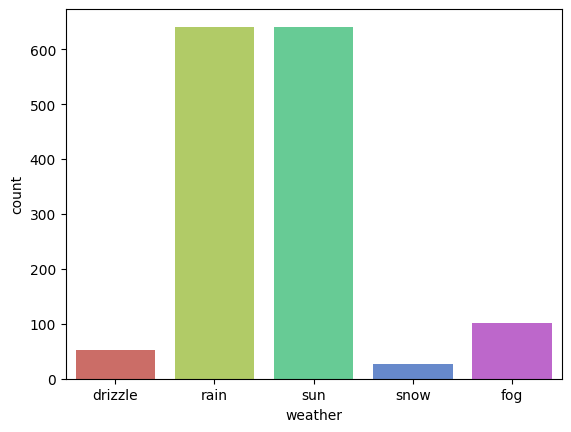

In [6]:
sns.countplot(x="weather", data=data, palette='hls') # Specify the column to be plotted using the 'x' argument

In [7]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [8]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the date
data['year'] = data['date'].dt.year

# Extract the month from the date
data['month'] = data['date'].dt.month # Added this line to extract the month

# Group by year and month, then calculate the average temperature
yearly_monthly_temp = data.groupby(['year', 'month'])['temp_max'].mean().unstack()

# Display the result
print(yearly_monthly_temp)

data.head()

month         1          2          3          4          5          6   \
year                                                                      
2012    7.054839   9.275862   9.554839  14.873333  17.661290  18.693333   
2013    6.106452   9.467857  12.709677  14.243333  19.625806  23.253333   
2014    9.600000   8.200000  12.906452  15.460000  19.870968  21.590000   
2015   10.154839  12.517857  14.377419  15.503333  20.025806  26.063333   

month         7          8          9          10         11         12  
year                                                                     
2012   22.906452  25.858065  22.880000  15.829032  11.326667   7.235484  
2013   26.093548  26.119355  21.360000  14.229032  12.053333   7.022581  
2014   26.900000  26.383871  23.163333  17.961290  11.030000  10.138710  
2015   28.093548  26.087097  20.293333  17.538710   9.683333   8.380645  


,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [10]:
# prompt: check for the null value in the dataset

data.isnull().sum()


,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0
year,0
month,0


<Axes: xlabel='wind', ylabel='Count'>

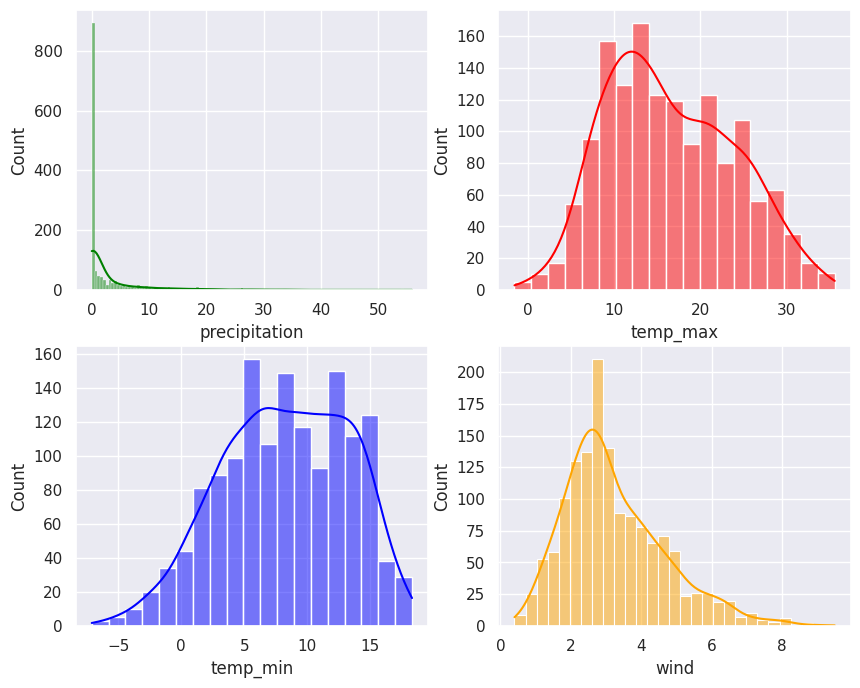

In [11]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

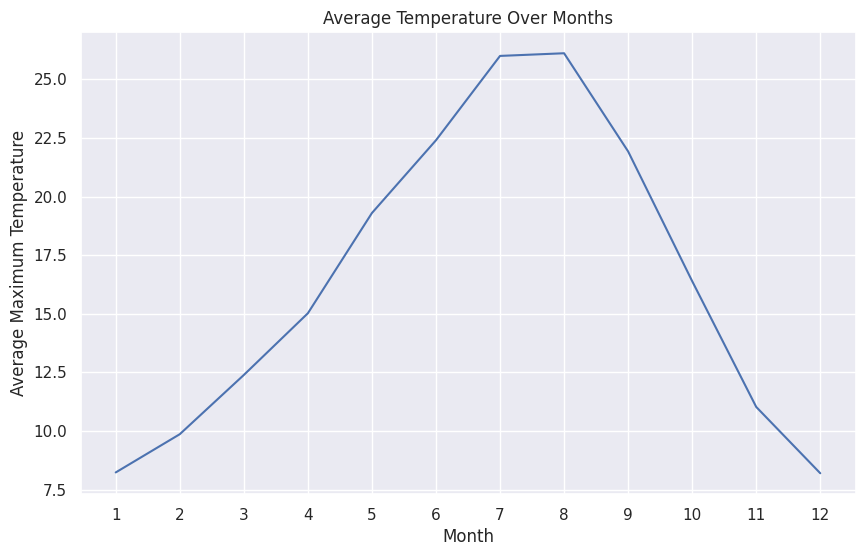

In [12]:
# prompt: draw the tempearture over every month of time

# Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

# Extract the month from the date
data['month'] = data['date'].dt.month

# Group by month and calculate the average temperature
monthly_temp = data.groupby('month')['temp_max'].mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values)
plt.xlabel('Month')
plt.ylabel('Average Maximum Temperature')
plt.title('Average Temperature Over Months')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

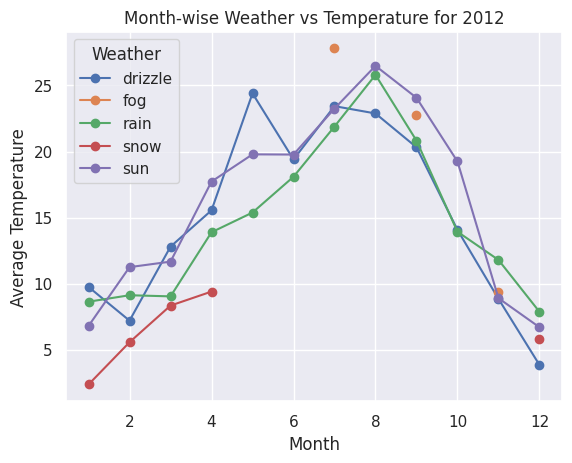

<Figure size 1200x600 with 0 Axes>

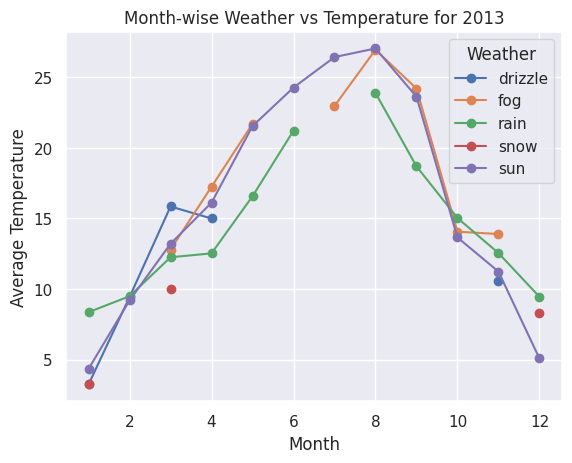

<Figure size 1200x600 with 0 Axes>

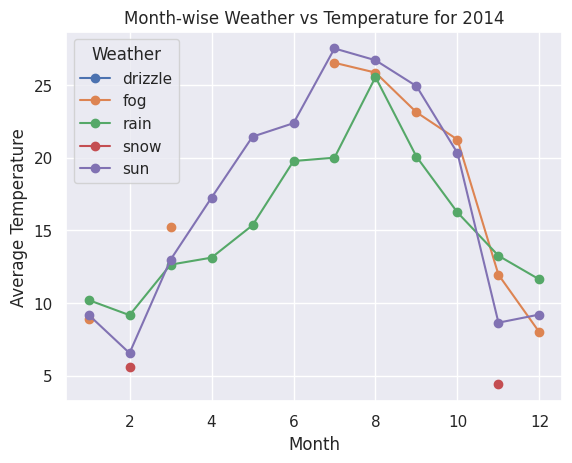

<Figure size 1200x600 with 0 Axes>

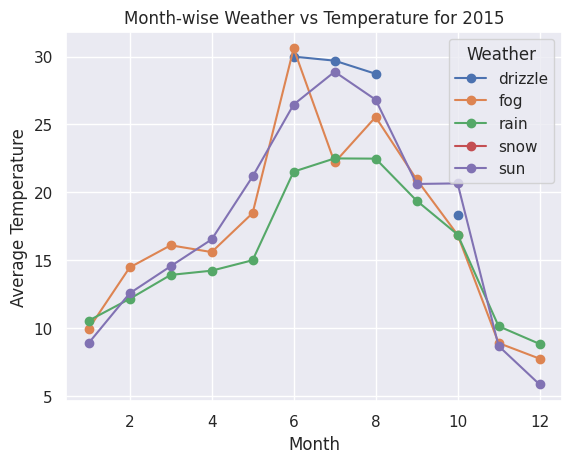

In [13]:
# prompt: draw month wise weather vs tempearture with year specified  daw for each year differently

import matplotlib.pyplot as plt

# Group by year, month, and weather, then calculate the average temperature
yearly_monthly_weather_temp = data.groupby(['year', 'month', 'weather'])['temp_max'].mean().unstack(level=2)

# Iterate over the years
for year in data['year'].unique():
  # Filter data for the current year
  year_data = yearly_monthly_weather_temp.loc[year]

  # Create a plot for the current year
  plt.figure(figsize=(12, 6))
  year_data.plot(kind='line', marker='o')
  plt.title(f'Month-wise Weather vs Temperature for {year}')
  plt.xlabel('Month')
  plt.ylabel('Average Temperature')
  plt.legend(title='Weather')
  plt.grid(True)
  plt.show()


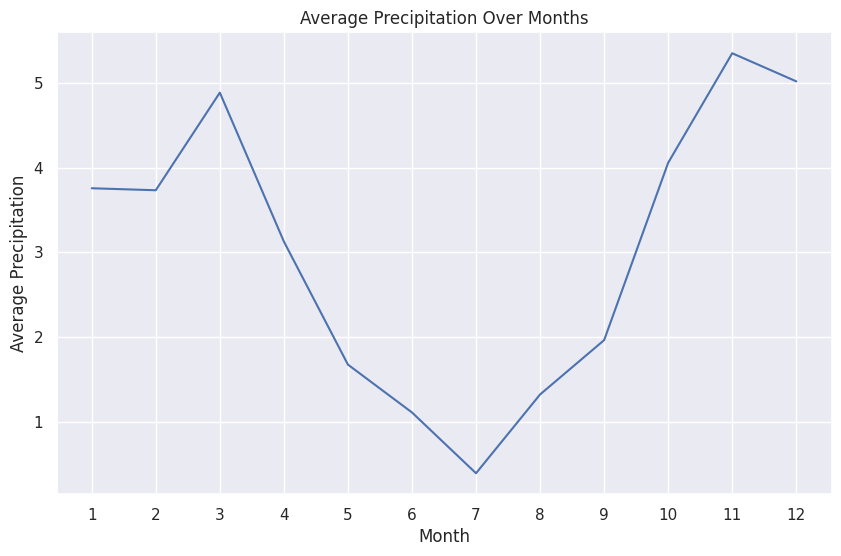

In [14]:
# prompt: draw precipation over every month

# Group by month and calculate the average precipitation
monthly_precipitation = data.groupby('month')['precipitation'].mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation.index, monthly_precipitation.values)
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation Over Months')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

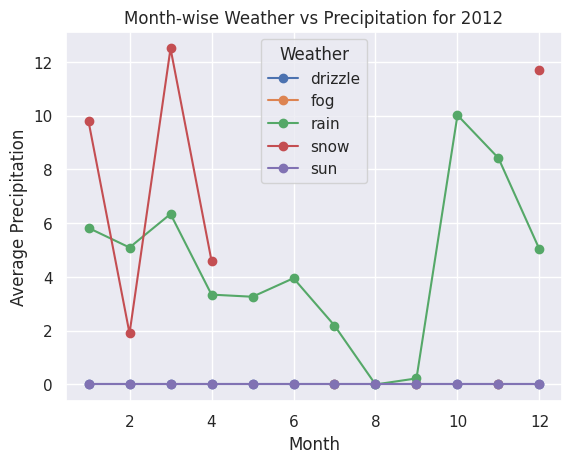

<Figure size 1200x600 with 0 Axes>

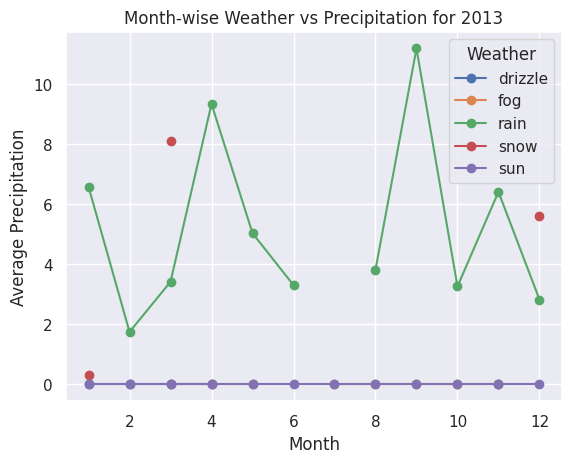

<Figure size 1200x600 with 0 Axes>

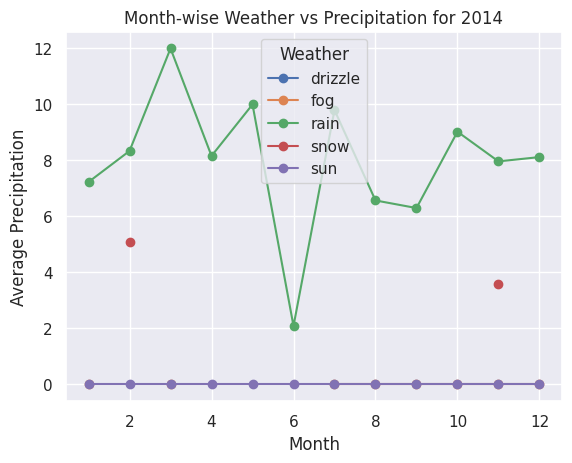

<Figure size 1200x600 with 0 Axes>

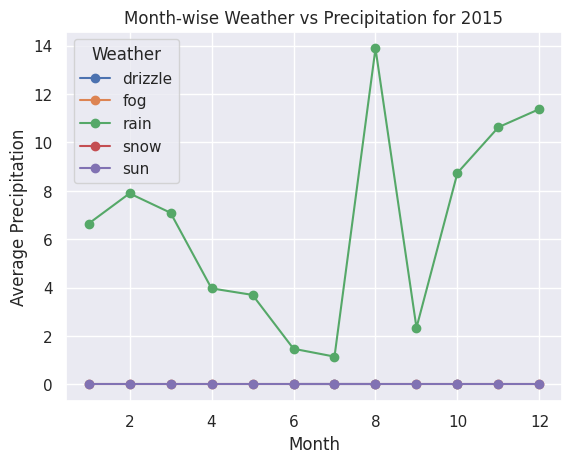

In [15]:
# prompt: draw month wise weather vs Precipitation with year specified  daw for each year differently

# Group by year, month, and weather, then calculate the average precipitation
yearly_monthly_weather_precipitation = data.groupby(['year', 'month', 'weather'])['precipitation'].mean().unstack(level=2)

# Iterate over the years
for year in data['year'].unique():
  # Filter data for the current year
  year_data = yearly_monthly_weather_precipitation.loc[year]

  # Create a plot for the current year
  plt.figure(figsize=(12, 6))
  year_data.plot(kind='line', marker='o')
  plt.title(f'Month-wise Weather vs Precipitation for {year}')
  plt.xlabel('Month')
  plt.ylabel('Average Precipitation')
  plt.legend(title='Weather')
  plt.grid(True)
  plt.show()


<Figure size 1200x600 with 0 Axes>

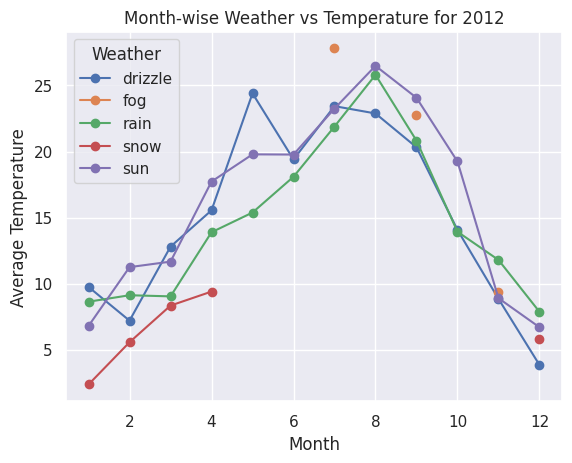

<Figure size 1200x600 with 0 Axes>

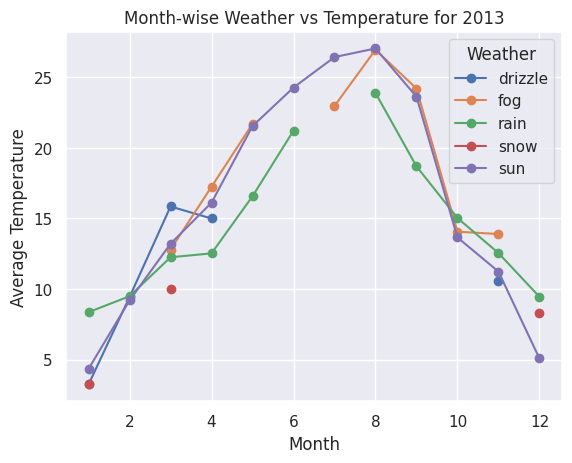

<Figure size 1200x600 with 0 Axes>

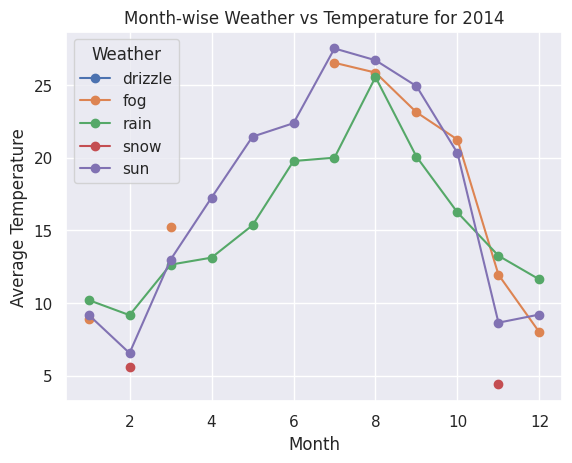

<Figure size 1200x600 with 0 Axes>

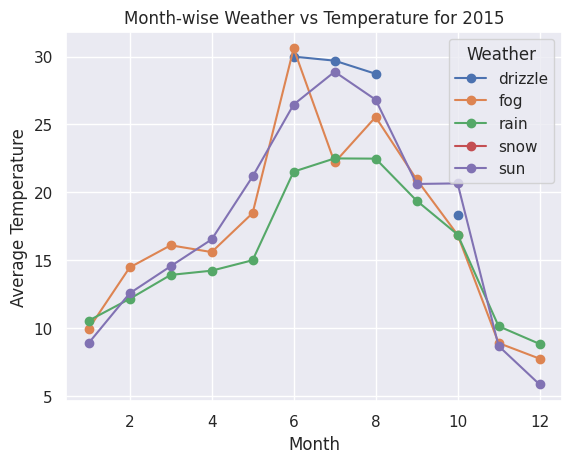

In [16]:
# prompt: why is sun weather zero here

# Group by year, month, and weather, then calculate the average temperature
yearly_monthly_weather_temp = data.groupby(['year', 'month', 'weather'])['temp_max'].mean().unstack(level=2)

# Iterate over the years
for year in data['year'].unique():
  # Filter data for the current year
  year_data = yearly_monthly_weather_temp.loc[year]

  # Check if 'sun' is present in the columns
  if 'sun' in year_data.columns:
    # Create a plot for the current year
    plt.figure(figsize=(12, 6))
    year_data.plot(kind='line', marker='o')
    plt.title(f'Month-wise Weather vs Temperature for {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature')
    plt.legend(title='Weather')
    plt.grid(True)
    plt.show()
  else:
    print(f"No 'sun' weather data found for year {year}")


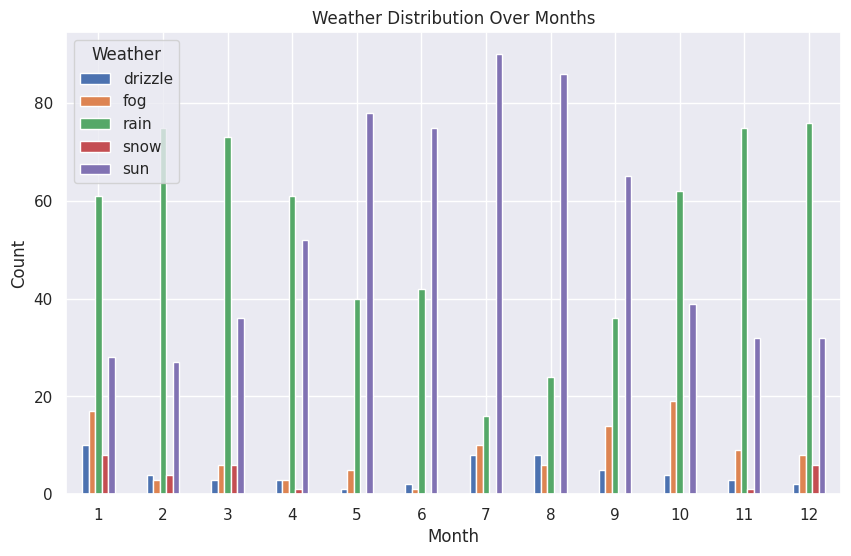

In [17]:
# prompt: draw weather  over evry moth

# Group by month and weather condition, then count occurrences
weather_by_month = data.groupby(['month', 'weather'])['weather'].count().unstack()

# Create a plot
weather_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Weather Distribution Over Months')
plt.xticks(rotation=0)
plt.legend(title='Weather')
plt.show()


<Figure size 1200x600 with 0 Axes>

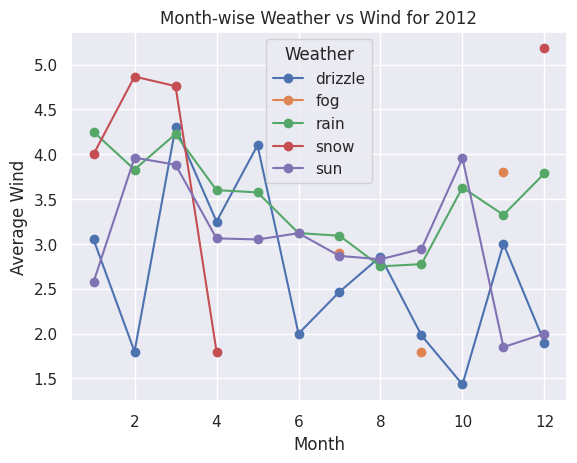

<Figure size 1200x600 with 0 Axes>

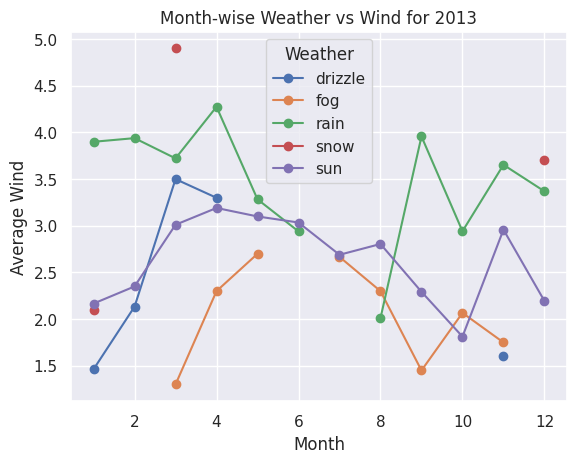

<Figure size 1200x600 with 0 Axes>

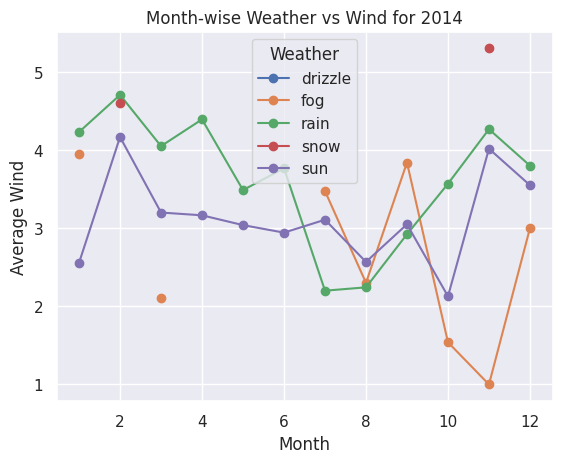

<Figure size 1200x600 with 0 Axes>

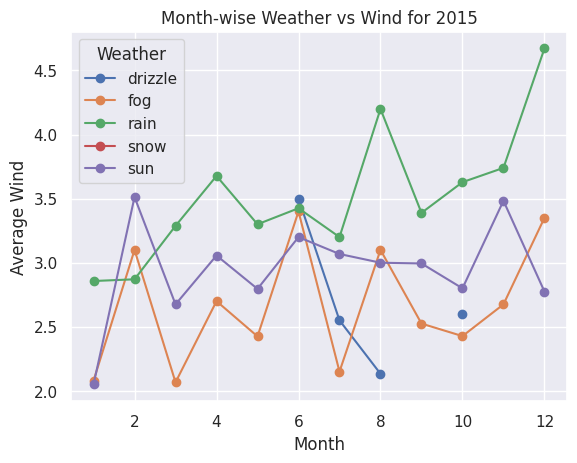

In [18]:
# prompt: draw month wise weather vs Wind with year specified  daw for each year differently

# Group by year, month, and weather, then calculate the average wind
yearly_monthly_weather_wind = data.groupby(['year', 'month', 'weather'])['wind'].mean().unstack(level=2)

# Iterate over the years
for year in data['year'].unique():
  # Filter data for the current year
  year_data = yearly_monthly_weather_wind.loc[year]

  # Create a plot for the current year
  plt.figure(figsize=(12, 6))
  year_data.plot(kind='line', marker='o')
  plt.title(f'Month-wise Weather vs Wind for {year}')
  plt.xlabel('Month')
  plt.ylabel('Average Wind')
  plt.legend(title='Weather')
  plt.grid(True)
  plt.show()


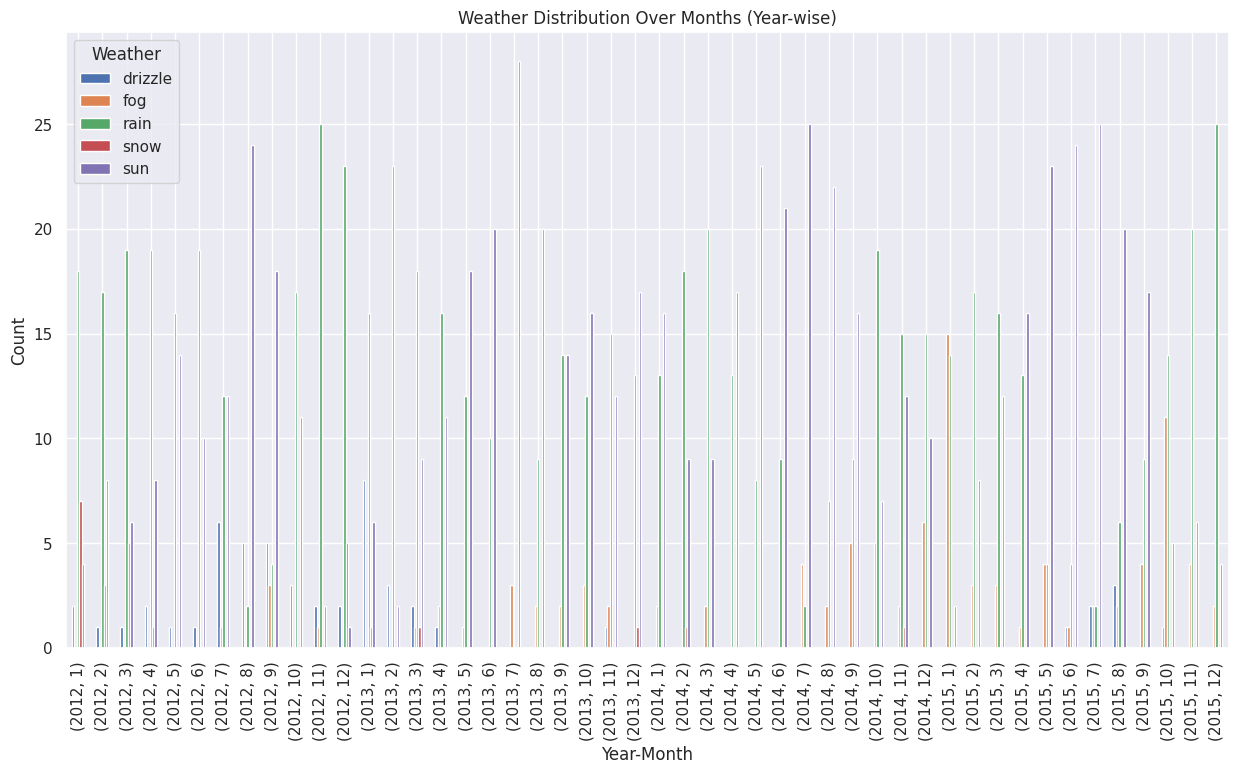

In [19]:
# prompt: draw the weatger over evry month year wise

# Group by year, month, and weather condition, then count occurrences
weather_by_year_month = data.groupby([data['date'].dt.year, 'month', 'weather'])['weather'].count().unstack() # Changed 'date.year' to data['date'].dt.year to extract year from the date column

# Create a plota
weather_by_year_month.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Weather Distribution Over Months (Year-wise)')
plt.xticks(rotation=90)
plt.legend(title='Weather')
plt.show()

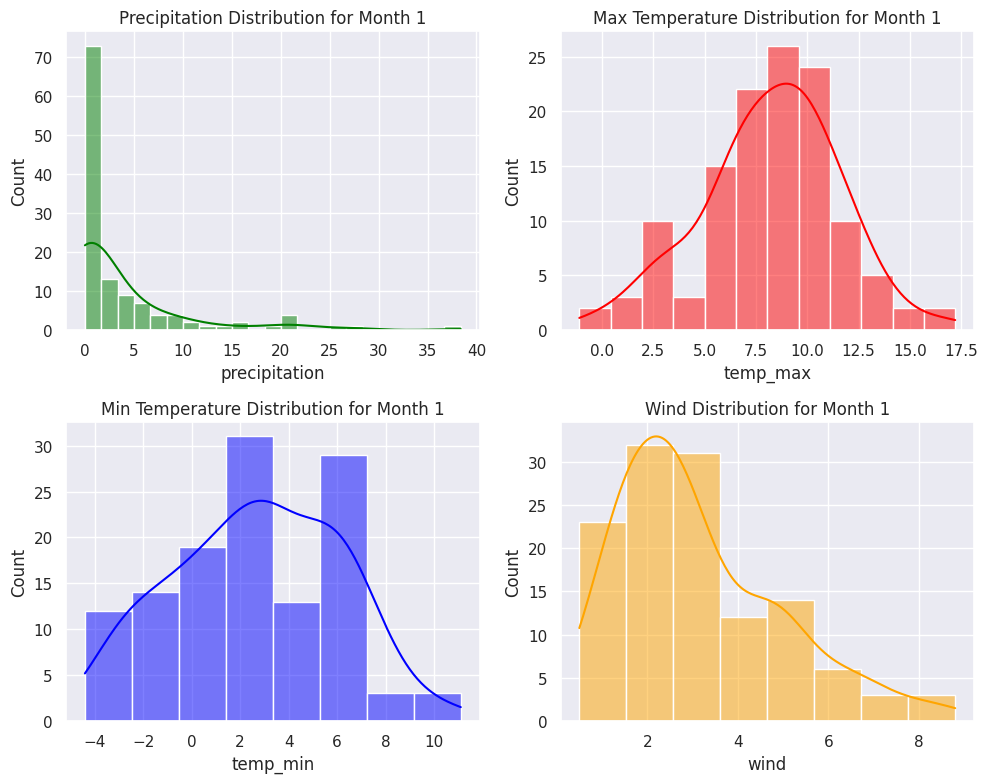

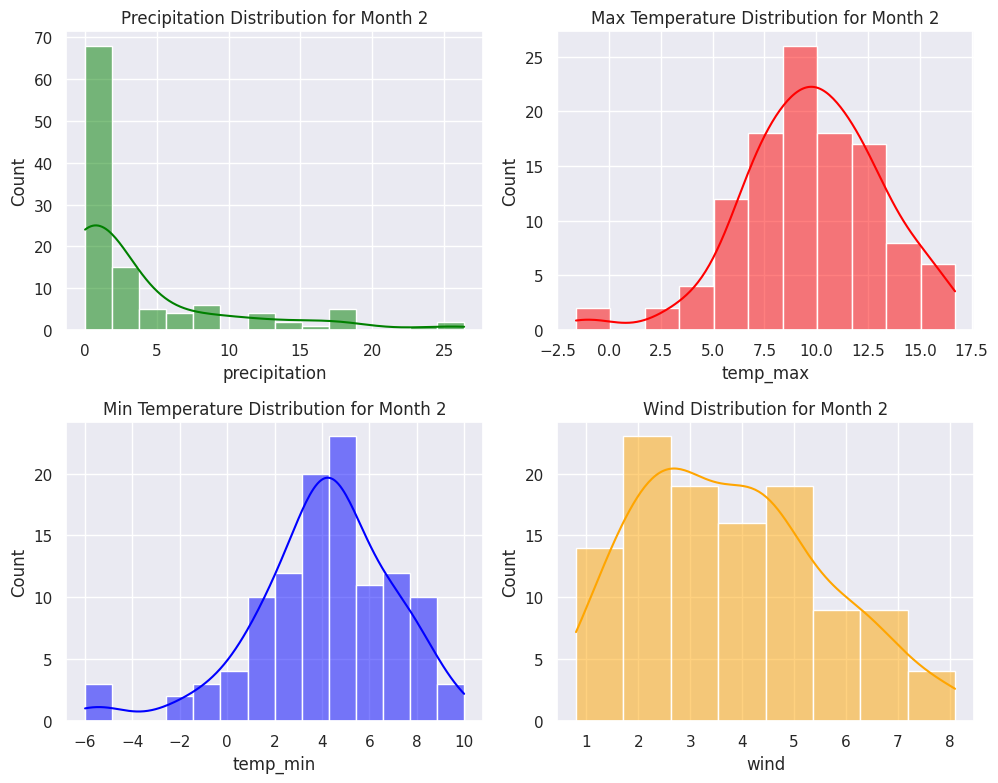

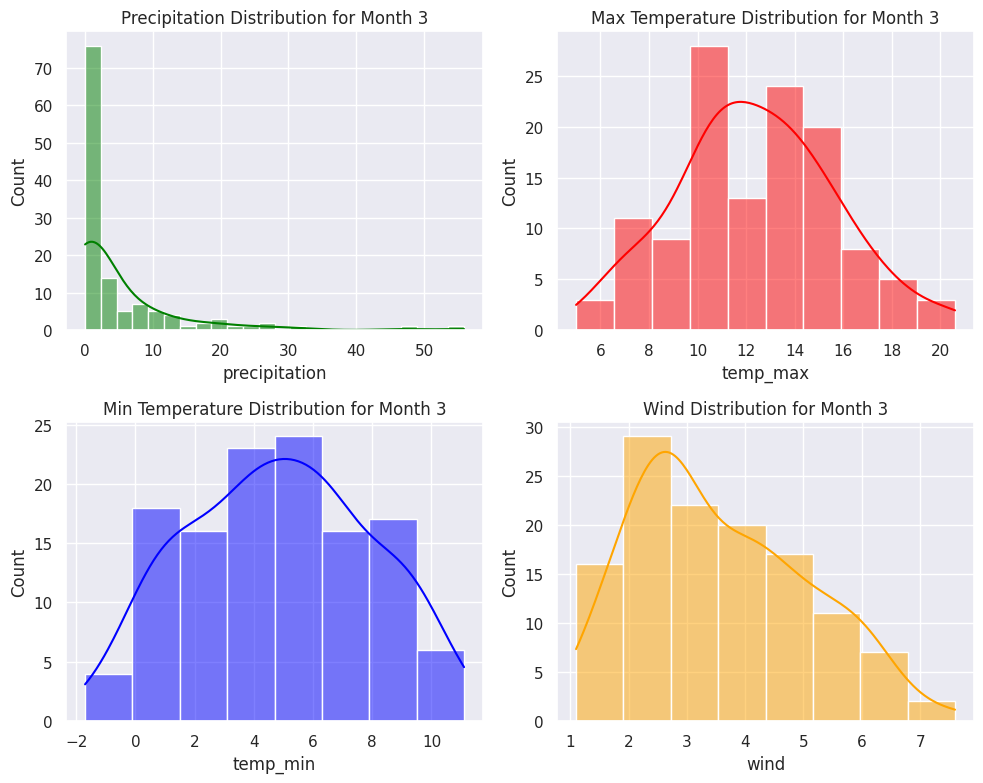

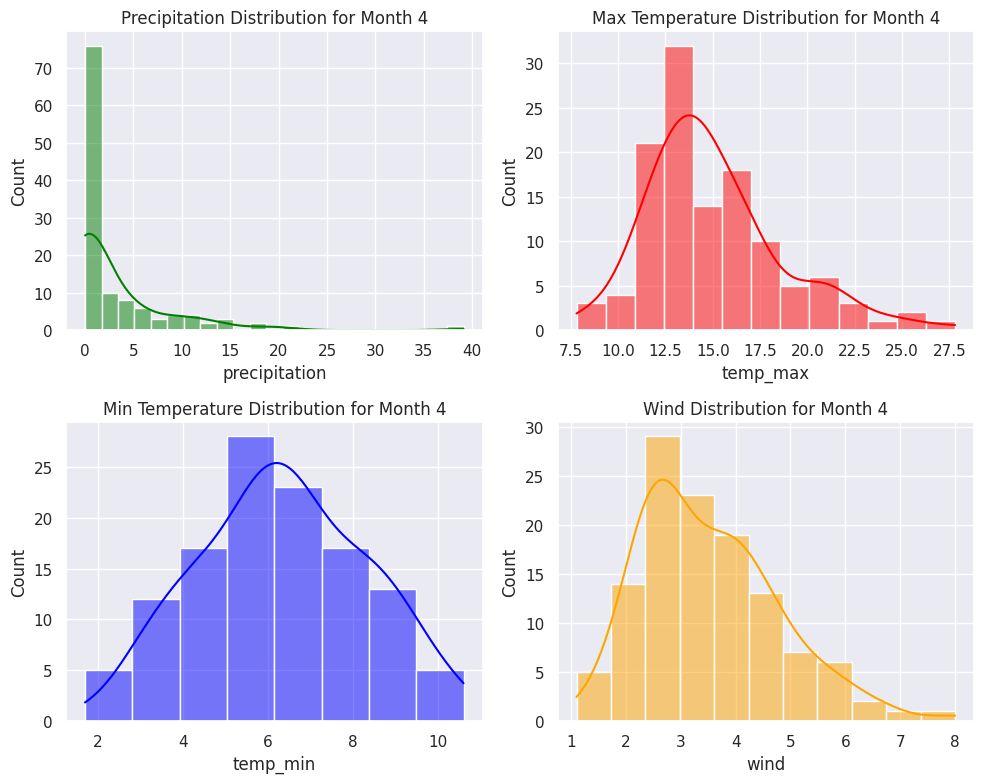

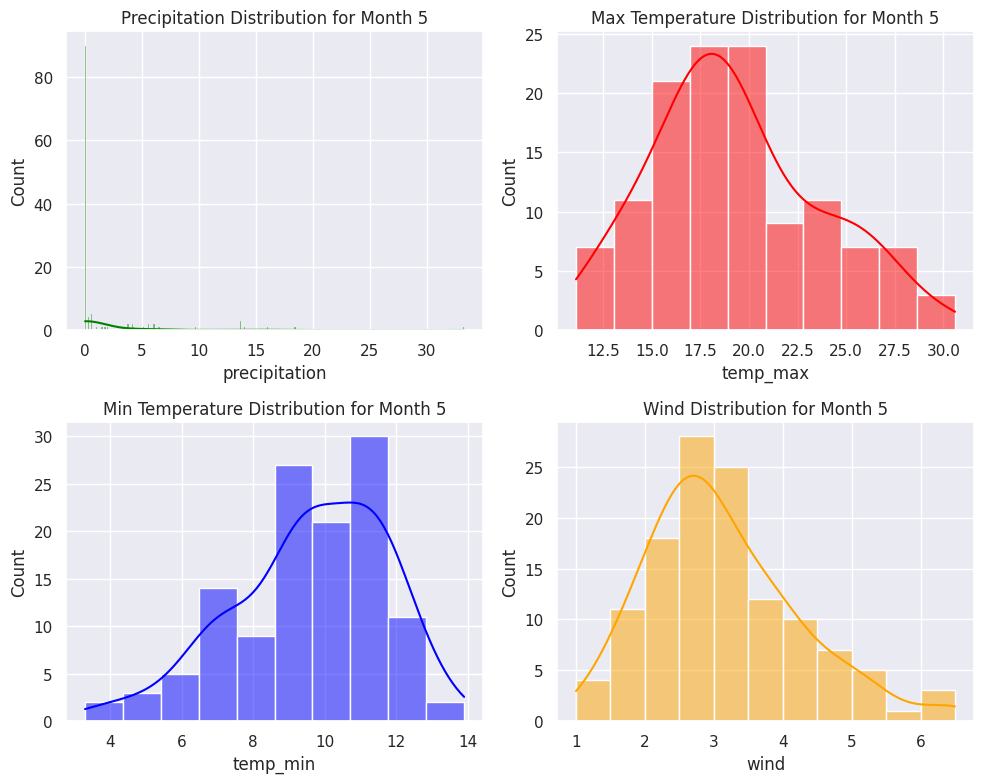

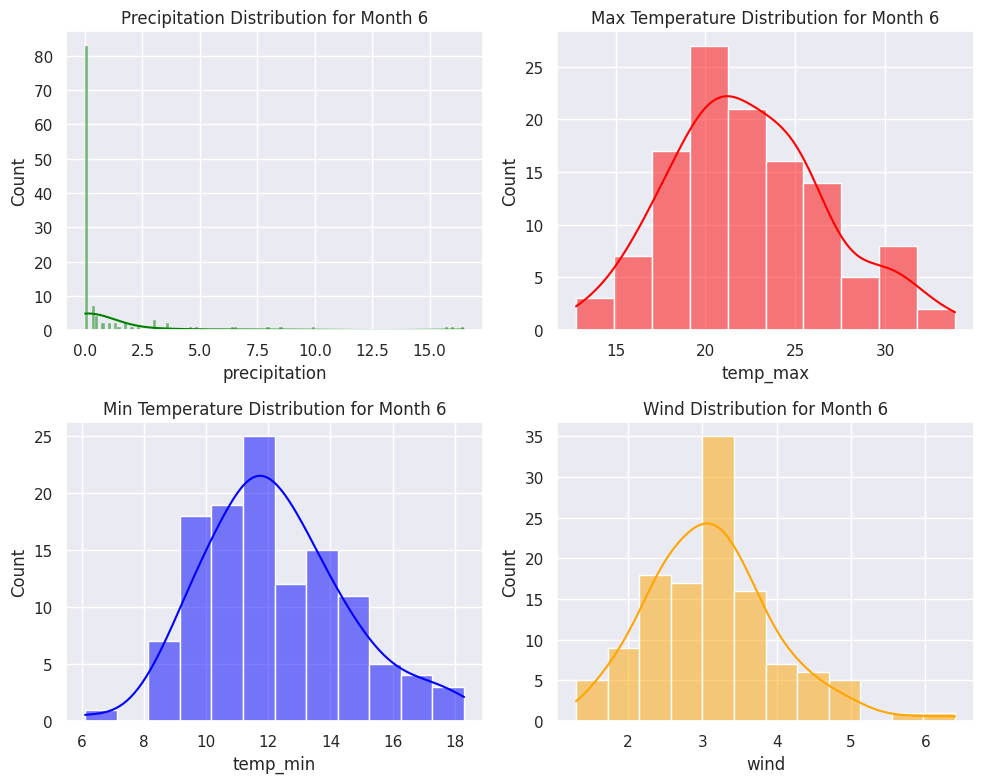

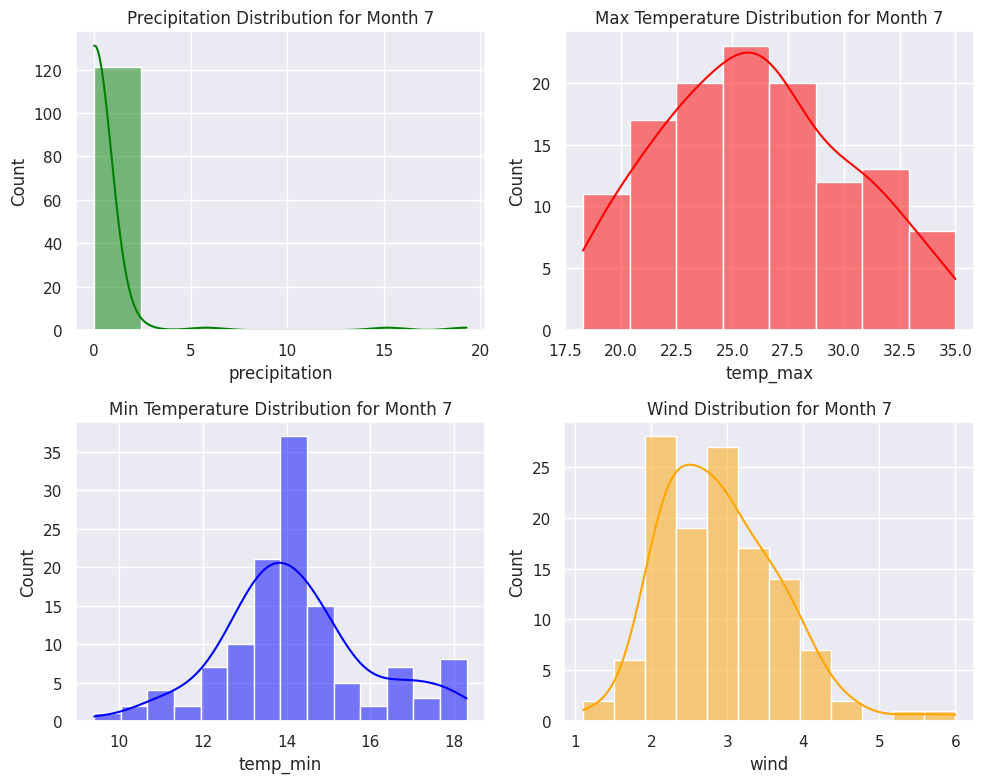

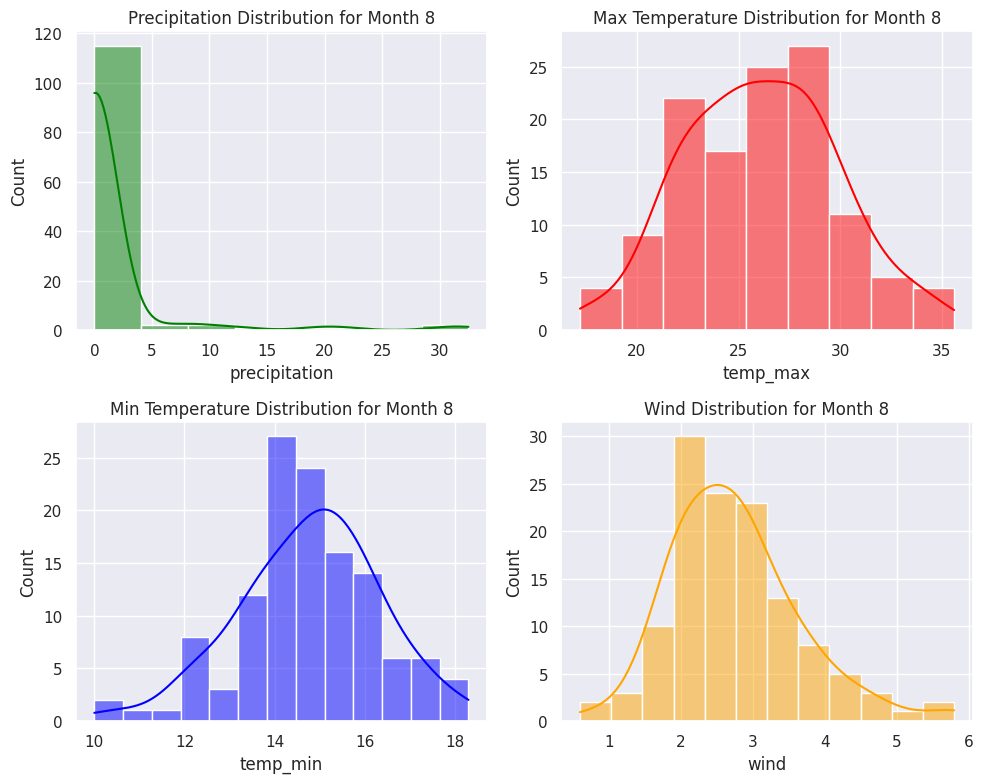

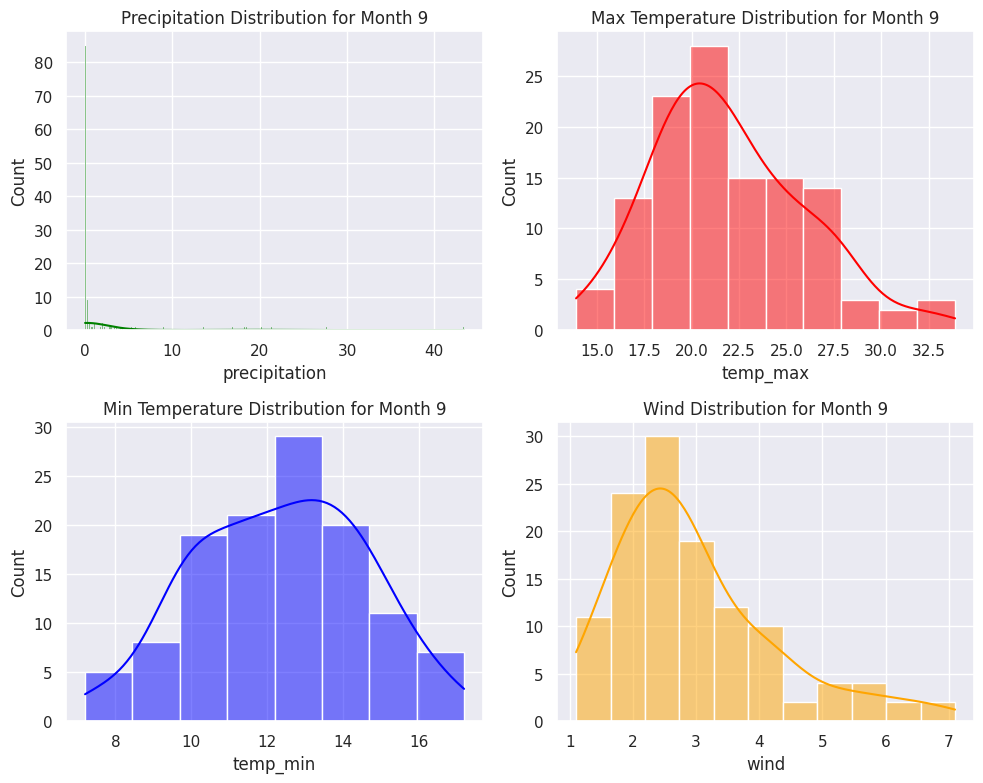

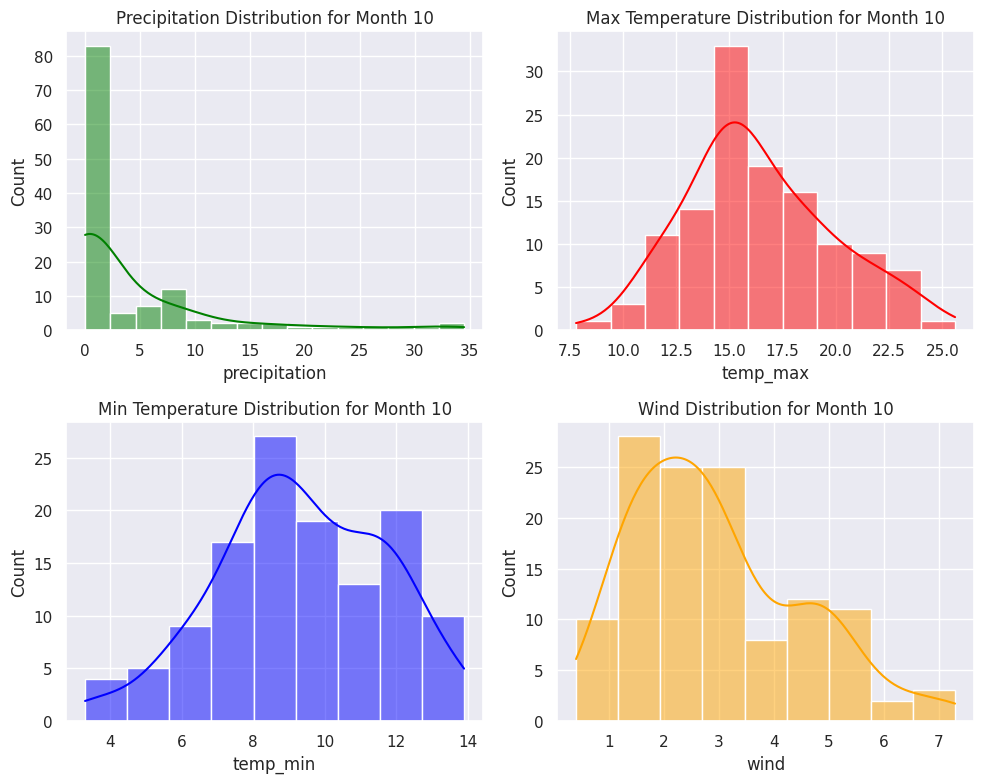

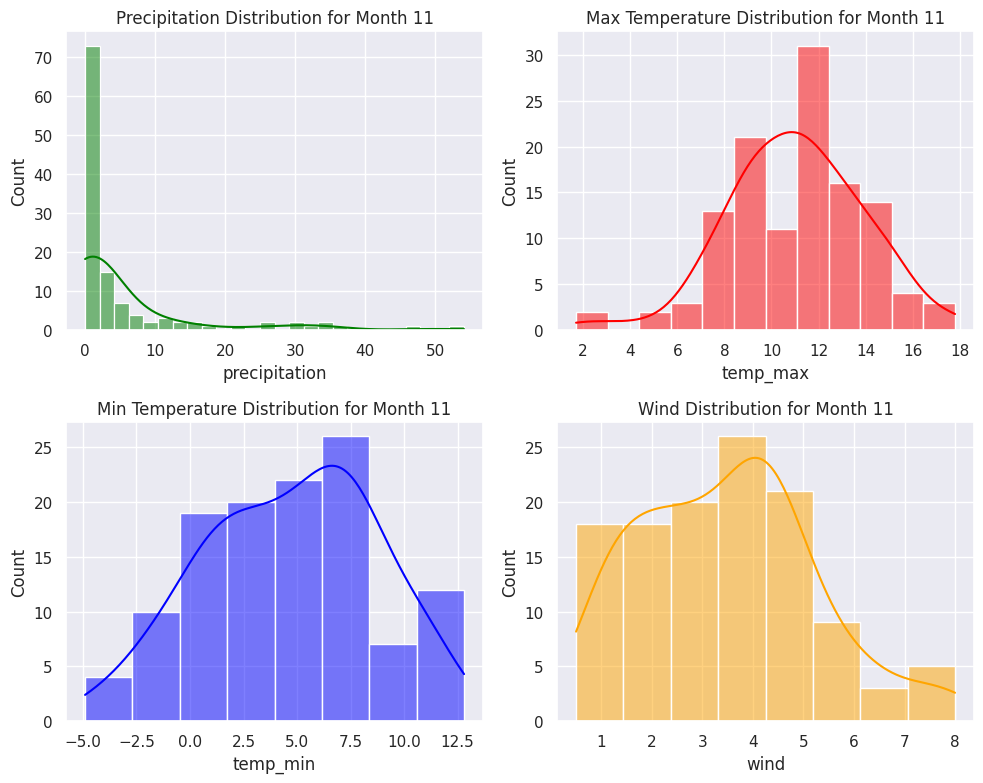

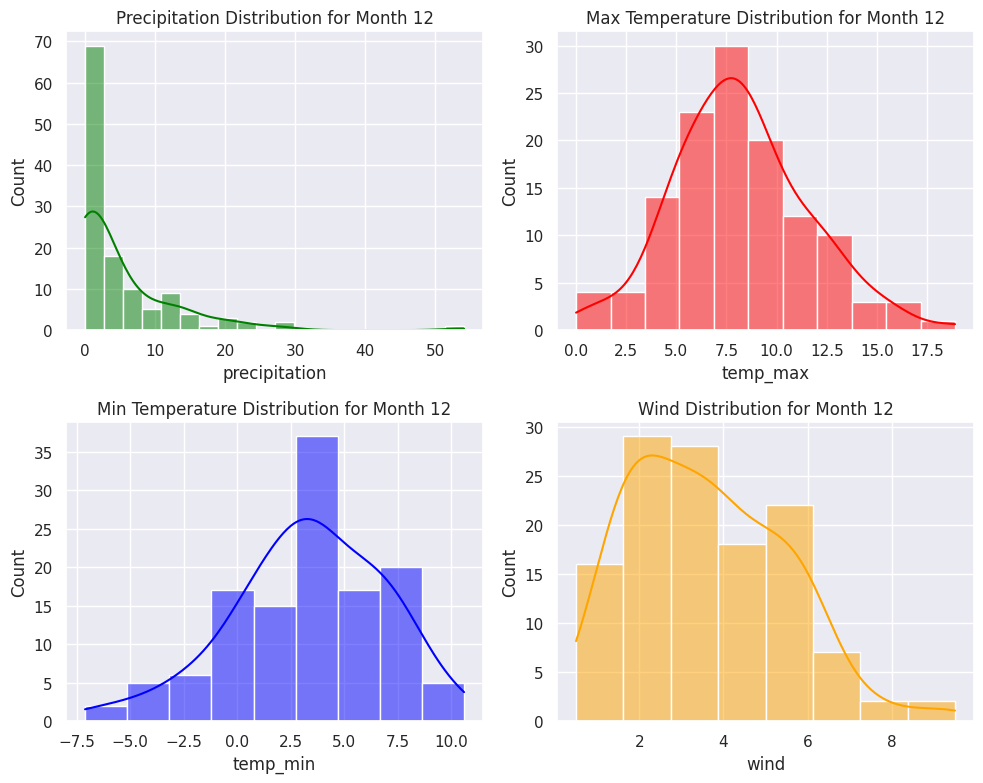

In [20]:
# prompt: now draw visualisations each month and with every column

# Group data by month
for month in data['month'].unique():
  monthly_data = data[data['month'] == month]

  # Create subplots for each column
  fig, axs = plt.subplots(2, 2, figsize=(10, 8))

  # Plot histograms for each column
  sns.histplot(data=monthly_data, x='precipitation', kde=True, ax=axs[0, 0], color='green')
  sns.histplot(data=monthly_data, x='temp_max', kde=True, ax=axs[0, 1], color='red')
  sns.histplot(data=monthly_data, x='temp_min', kde=True, ax=axs[1, 0], color='blue')
  sns.histplot(data=monthly_data, x='wind', kde=True, ax=axs[1, 1], color='orange')

  # Set titles and labels
  axs[0, 0].set_title(f'Precipitation Distribution for Month {month}')
  axs[0, 1].set_title(f'Max Temperature Distribution for Month {month}')
  axs[1, 0].set_title(f'Min Temperature Distribution for Month {month}')
  axs[1, 1].set_title(f'Wind Distribution for Month {month}')

  # Adjust layout and display
  plt.tight_layout()
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


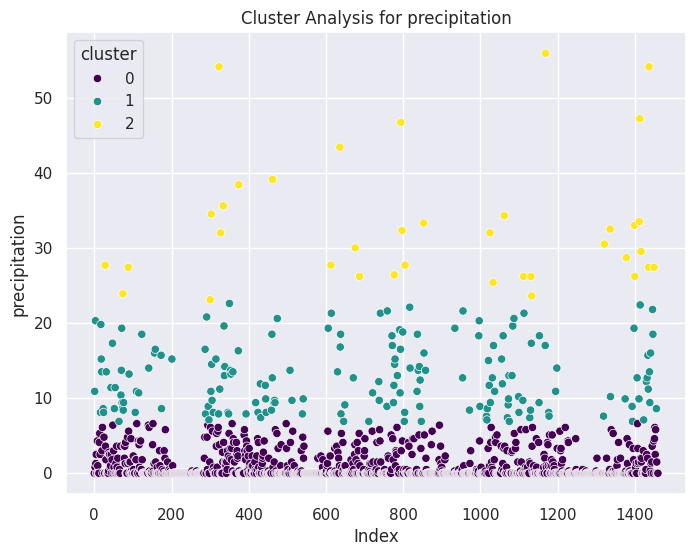

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


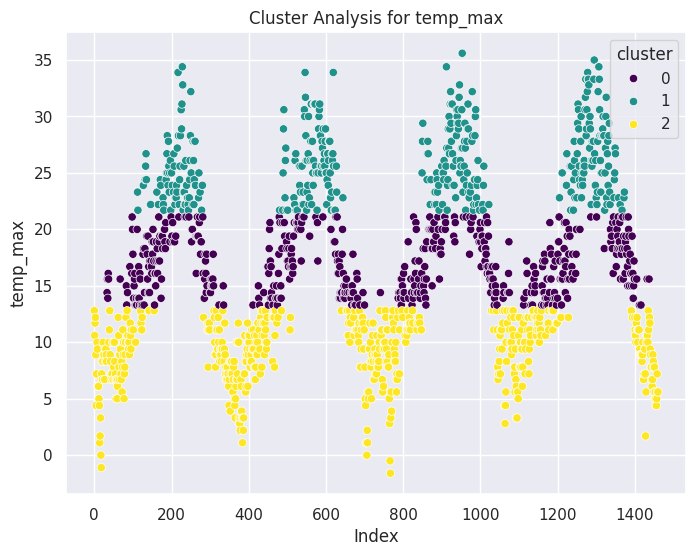

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


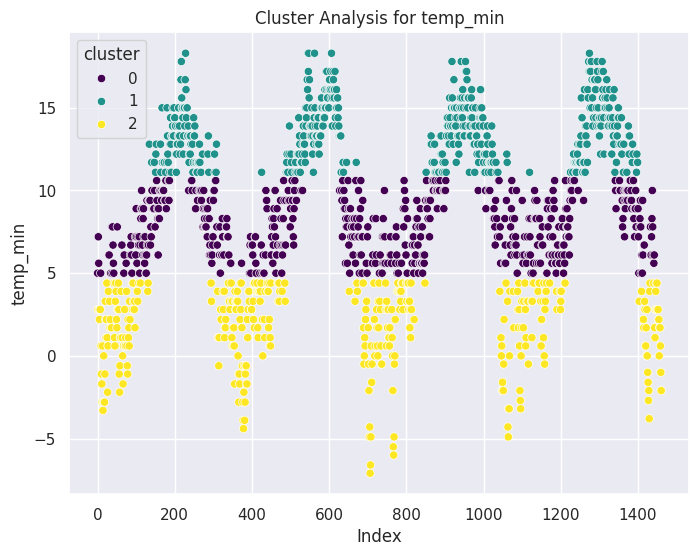

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


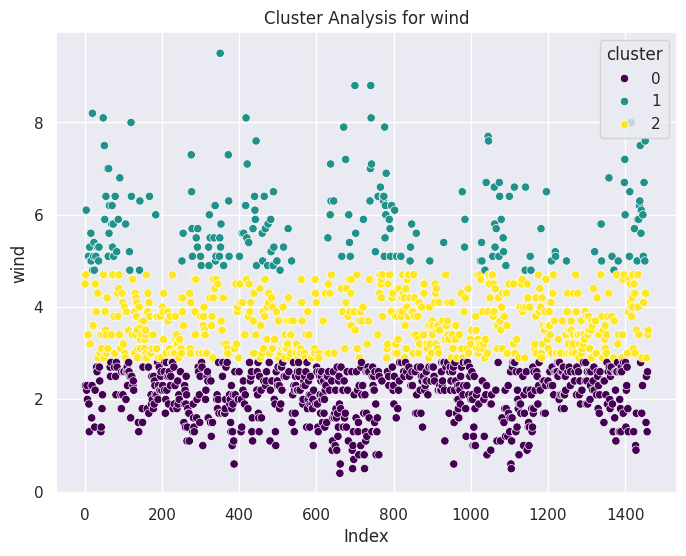

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


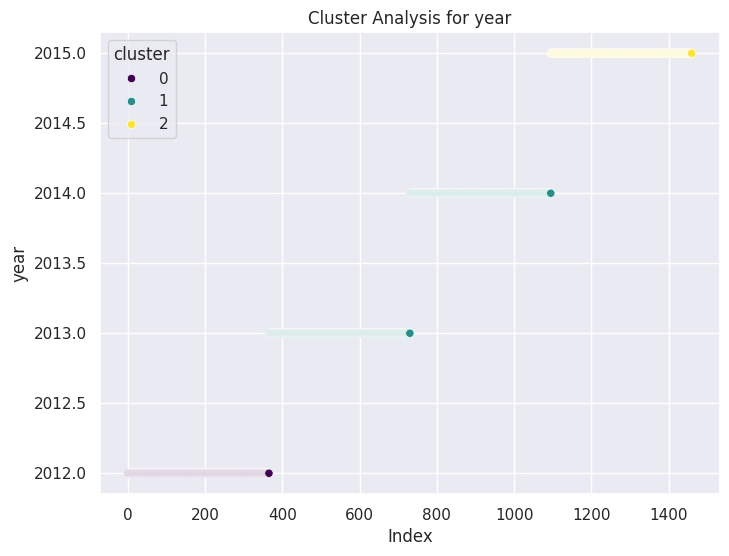

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-21-ec9d9c027dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['cluster'] = kmeans.fit_predict(df_col)


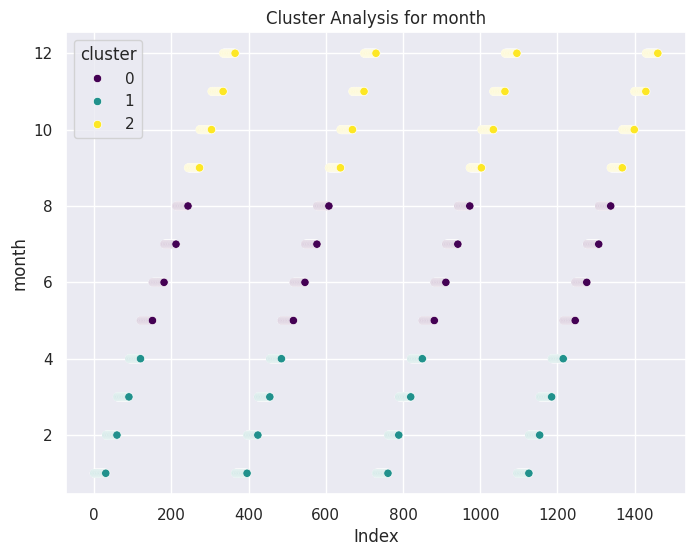

In [21]:
# prompt: make a cluster analysis for each column

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loop through each column for cluster analysis
for col in data.select_dtypes(include=['number']).columns:
  # Create a new DataFrame with only the current column
  df_col = data[[col]]

  # Apply KMeans clustering (you can adjust the number of clusters as needed)
  kmeans = KMeans(n_clusters=3)
  df_col['cluster'] = kmeans.fit_predict(df_col)

  # Plot the clusters
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df_col.index, y=col, hue='cluster', data=df_col, palette='viridis')
  plt.title(f'Cluster Analysis for {col}')
  plt.xlabel('Index')
  plt.ylabel(col)
  plt.show()


<ipython-input-22-d5a1eeefe747>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wind',y='weather',data=data,palette='YlOrBr') # Changed the first two arguments to keyword arguments


<Axes: xlabel='wind', ylabel='weather'>

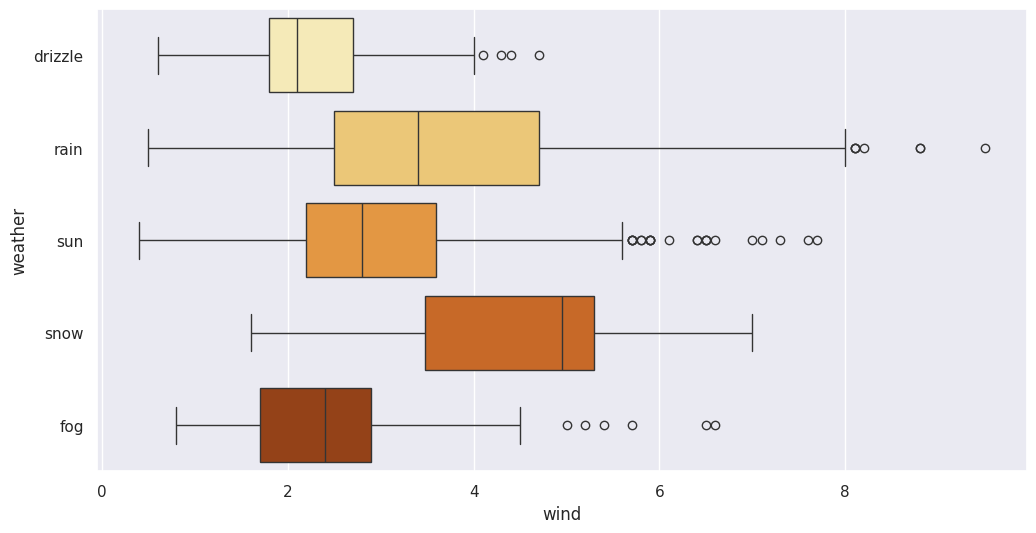

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='wind',y='weather',data=data,palette='YlOrBr') # Changed the first two arguments to keyword arguments

<ipython-input-23-3f34fcbf580a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr') # Changed the first two arguments to keyword arguments


<Axes: xlabel='temp_min', ylabel='weather'>

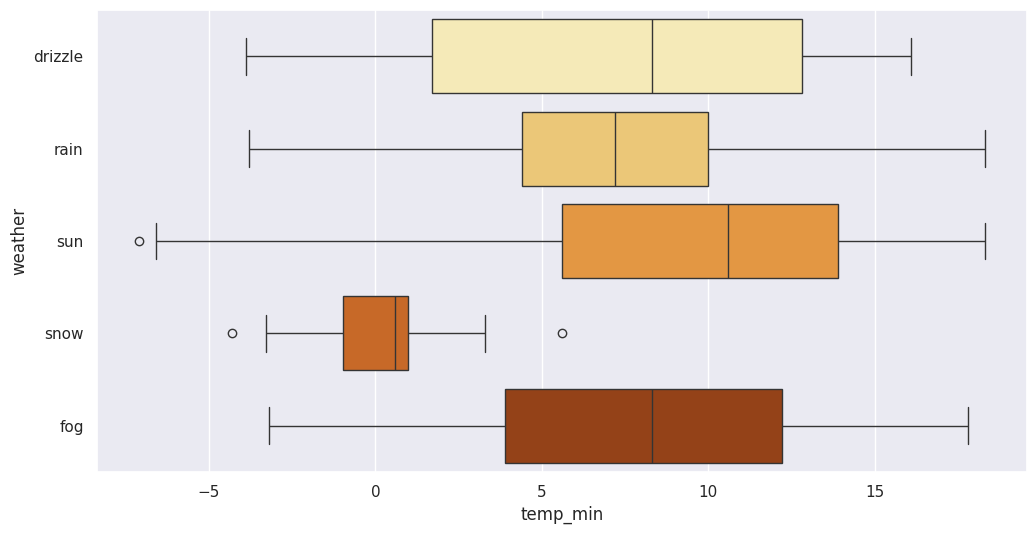

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr') # Changed the first two arguments to keyword arguments

<Axes: >

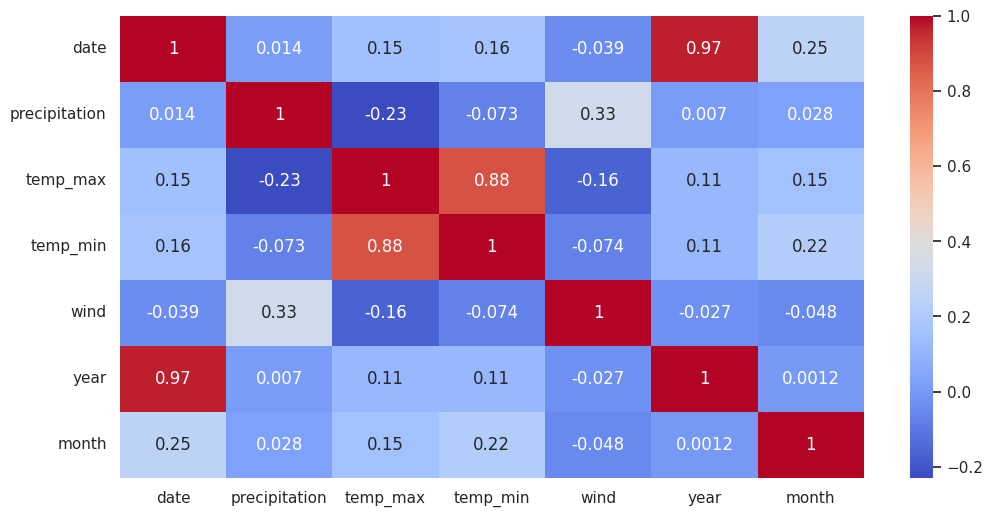

In [24]:
# Convert the 'weather' column to a categorical type.
data['weather'] = data['weather'].astype('category')

# Calculate the correlation matrix.
plt.figure(figsize=(12,6))
# Remove the 'weather' column from the DataFrame before calculating the correlation matrix.
sns.heatmap(data.drop('weather', axis=1).corr(),annot=True,cmap='coolwarm')

In [25]:
from sklearn.model_selection import train_test_split

# Assuming your data is loaded into a DataFrame named 'data'
# If not, replace 'data' with the actual name of your DataFrame

# Check the actual column names in your DataFrame
print(data.columns)

# Input features (excluding 'temp_min', 'temp_max' and 'weather')
X = data.drop(columns=['temp_min', 'temp_max', 'weather'])

# Target variables
y_temp_min = data['temp_min']  # For minimum temperature prediction
y_temp_max = data['temp_max']  # For maximum temperature prediction
y_weather = data['weather']  # For weather condition classification

# Train-test split for minimum temperature
X_train, X_test, y_train_temp_min, y_test_temp_min = train_test_split(X, y_temp_min, test_size=0.2, random_state=42)

# Train-test split for maximum temperature
X_train, X_test, y_train_temp_max, y_test_temp_max = train_test_split(X, y_temp_max, test_size=0.2, random_state=42)

# Train-test split for weather condition
X_train, X_test, y_train_weather, y_test_weather = train_test_split(X, y_weather, test_size=0.2, random_state=42)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year', 'month'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import the model you want to use
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'
# If not, replace 'data' with the actual name of your DataFrame

# Check the actual column names in your DataFrame
print(data.columns)

# Input features (excluding 'temp_min', 'temp_max' and 'weather')
X = data.drop(columns=['temp_min', 'temp_max', 'weather'])

# Target variables
y_temp_min = data['temp_min']  # For minimum temperature prediction
y_temp_max = data['temp_max']  # For maximum temperature prediction
y_weather = data['weather']  # For weather condition classification

# Train-test split for minimum temperature
X_train, X_test, y_train_temp_min, y_test_temp_min = train_test_split(X, y_temp_min, test_size=0.2, random_state=42)

# Train-test split for maximum temperature
X_train, X_test, y_train_temp_max, y_test_temp_max = train_test_split(X, y_temp_max, test_size=0.2, random_state=42)

# Train-test split for weather condition
X_train, X_test, y_train_weather, y_test_weather = train_test_split(X, y_weather, test_size=0.2, random_state=42)

# Convert date columns to numerical features
# Assuming 'date' is your date column, replace with your actual date column name
X_train['date'] = pd.to_numeric(X_train['date'])
X_test['date'] = pd.to_numeric(X_test['date'])

# Now you can fit the model
temp_model = LinearRegression() # Create an instance of your model
temp_model.fit(X_train, y_train_temp_min)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year', 'month'],
      dtype='object')


LinearRegression()

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier for weather condition prediction
weather_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
weather_model.fit(X_train, y_train_weather)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict temperature on the test set
y_pred_temp = temp_model.predict(X_test)

# Calculate MAE and RMSE
# Use y_test_temp_min or y_test_temp_max depending on which temperature you are evaluating
mae_temp = mean_absolute_error(y_test_temp_min, y_pred_temp)
rmse_temp = mean_squared_error(y_test_temp_min, y_pred_temp, squared=False)

print(f'MAE for Temperature Prediction: {mae_temp}')
print(f'RMSE for Temperature Prediction: {rmse_temp}')

MAE for Temperature Prediction: 4.3037937442160406
RMSE for Temperature Prediction: 5.047997450902084


In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Predict weather condition on the test set
y_pred_weather = weather_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy_weather = accuracy_score(y_test_weather, y_pred_weather)
print(f'Accuracy for Weather Prediction: {accuracy_weather}')

# Detailed classification report
print(classification_report(y_test_weather, y_pred_weather))


Accuracy for Weather Prediction: 0.8395904436860068
              precision    recall  f1-score   support

     drizzle       0.57      0.44      0.50         9
         fog       0.64      0.28      0.39        25
        rain       0.90      0.93      0.91       120
        snow       0.50      0.12      0.20         8
         sun       0.82      0.93      0.87       131

    accuracy                           0.84       293
   macro avg       0.69      0.54      0.58       293
weighted avg       0.82      0.84      0.82       293



In [30]:
# Example future input data (replace with actual values)
future_data = pd.DataFrame({
    'date': [10], # Assuming 'date' represents the day of the month
    'precipitation': [10.9],
    'wind': [5],
    #'humidity': [690], # Add missing features
    #'pressure': [10], # Add missing features
    'year': [2024],
    'month': [9]
})

# Ensure column names and data types match those used during training

# Predict temperature and weather condition
predicted_temp = temp_model.predict(future_data)
predicted_weather = weather_model.predict(future_data)

print(f'Predicted Temperature: {predicted_temp[0]} °C')
print(f'Predicted Weather Condition (code): {predicted_weather[0]}')

Predicted Temperature: -22.402021794014182 °C
Predicted Weather Condition (code): rain


In [31]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1
